In [1]:
import astropy.units as u
import numpy as np
import os
import sys
os.environ['PIXEDFIT_HOME'] = '/nvme/scratch/work/tharvey/piXedfit/'
from ResolvedGalaxy import ResolvedGalaxy, make_EAZY_SED_fit_params_arr
from importlib import reload
from matplotlib import pyplot as plt

# Change dpi to make plots larger

plt.rcParams['figure.dpi'] = 100

# Disable tex in matplotlib

plt.rcParams['text.usetex'] = False

#%matplotlib inline

Running on Morgan.


In [2]:

''' Initialize a galaxy object - loading from galfind if necessary '''
galaxy = ResolvedGalaxy.init(5371, 'JOF', 'v11')

overwrite = False
''' Optional - make plots ''' 

''' Do binning '''
#img_processing = galaxy.pixedfit_processing(seg_combine=['F277W', 'F356W', 'F444W'], use_galfind_seg=True)
%matplotlib inline
#galaxy.pixedfit_binning(SNR_reqs=10, ref_band = 'F444W', min_band = 'F115W', overwrite=overwrite)
#galaxy.pixedfit_plot_binmap()

#''' Measure fluxes in bins '''
#tab = galaxy.measure_flux_in_bins()
#tab
#''' Do Bagpipes (if not done) '''

#''' Plot Bagpipes results '''


Loading from .h5
dvipng not found, disabling LaTeX


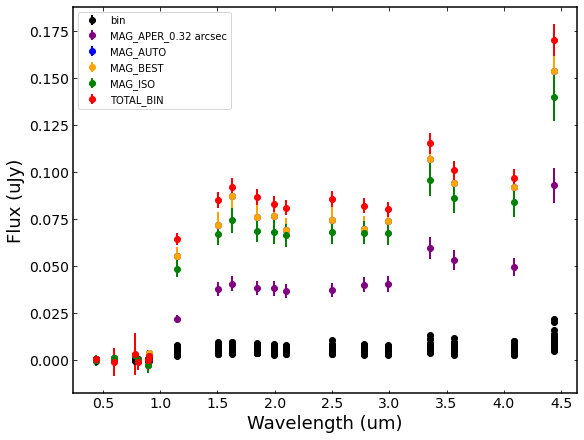

In [4]:
plt.rcParams['figure.dpi'] = 300
%matplotlib inline

tab = galaxy.plot_photometry_bins()
tab
plt.show()

In [9]:
# Simple test Bagpipes fit_instructions

sfh = {
    'age_max': (0.03, 1), # Gyr 
    'age_min': (0, 0.5), # Gyr
    'metallicity': (1e-3, 2.5), # solar
    'massformed': (4, 12), # log mstar/msun
    }

nebular = {}
nebular["logU"] = -2.0 

dust = {}
dust["type"] = "Calzetti"
dust["Av"] = (0, 5.0)

fit_instructions = {"t_bc":0.01,
                   "constant":sfh,
                   "nebular":nebular,
                   "dust":dust,  
                }
meta = {'run_name':'initial_test_cnst_sfh'}

overall_dict = {'meta': meta, 'fit_instructions': fit_instructions}

galaxy.run_bagpipes(overall_dict, overwrite=True)

Fixing redshift to 8.316405296325684
Fitting only all fluxes, which is 21 sources
Beginning fit
{'t_bc': 0.01, 'constant': {'age_max': (0.03, 1), 'age_min': (0, 0.5), 'metallicity': (0.001, 2.5), 'massformed': (4, 12)}, 'nebular': {'logU': -2.0}, 'dust': {'type': 'Calzetti', 'Av': (0, 5.0)}, 'redshift': 8.316405}
MultiNest not available. Switching to nautilus.

Bagpipes: fitting object 1


Completed in 156.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
constant:age_max               0.031      0.034      0.041
constant:age_min               0.000      0.000      0.001
constant:massformed            7.981      8.020      8.081
constant:metallicity           0.200      0.220      0.263
dust:Av                        0.739      0.779      0.818


Bagpipes: 1 out of 21 objects completed.
MultiNest not available. Switching to nautilus.

Bagpipes: fittin

rm: cannot remove ‘pipes/posterior/initial_test_cnst_sfh/JOF/5371/MAG_APER_0.32’: No such file or directory
rm: cannot remove ‘arcsec_*’: No such file or directory


Bagpipes: 21 out of 21 objects completed.


/nvme/scratch/software/anaconda3/envs/tharvey_galfind/lib/python3.10/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


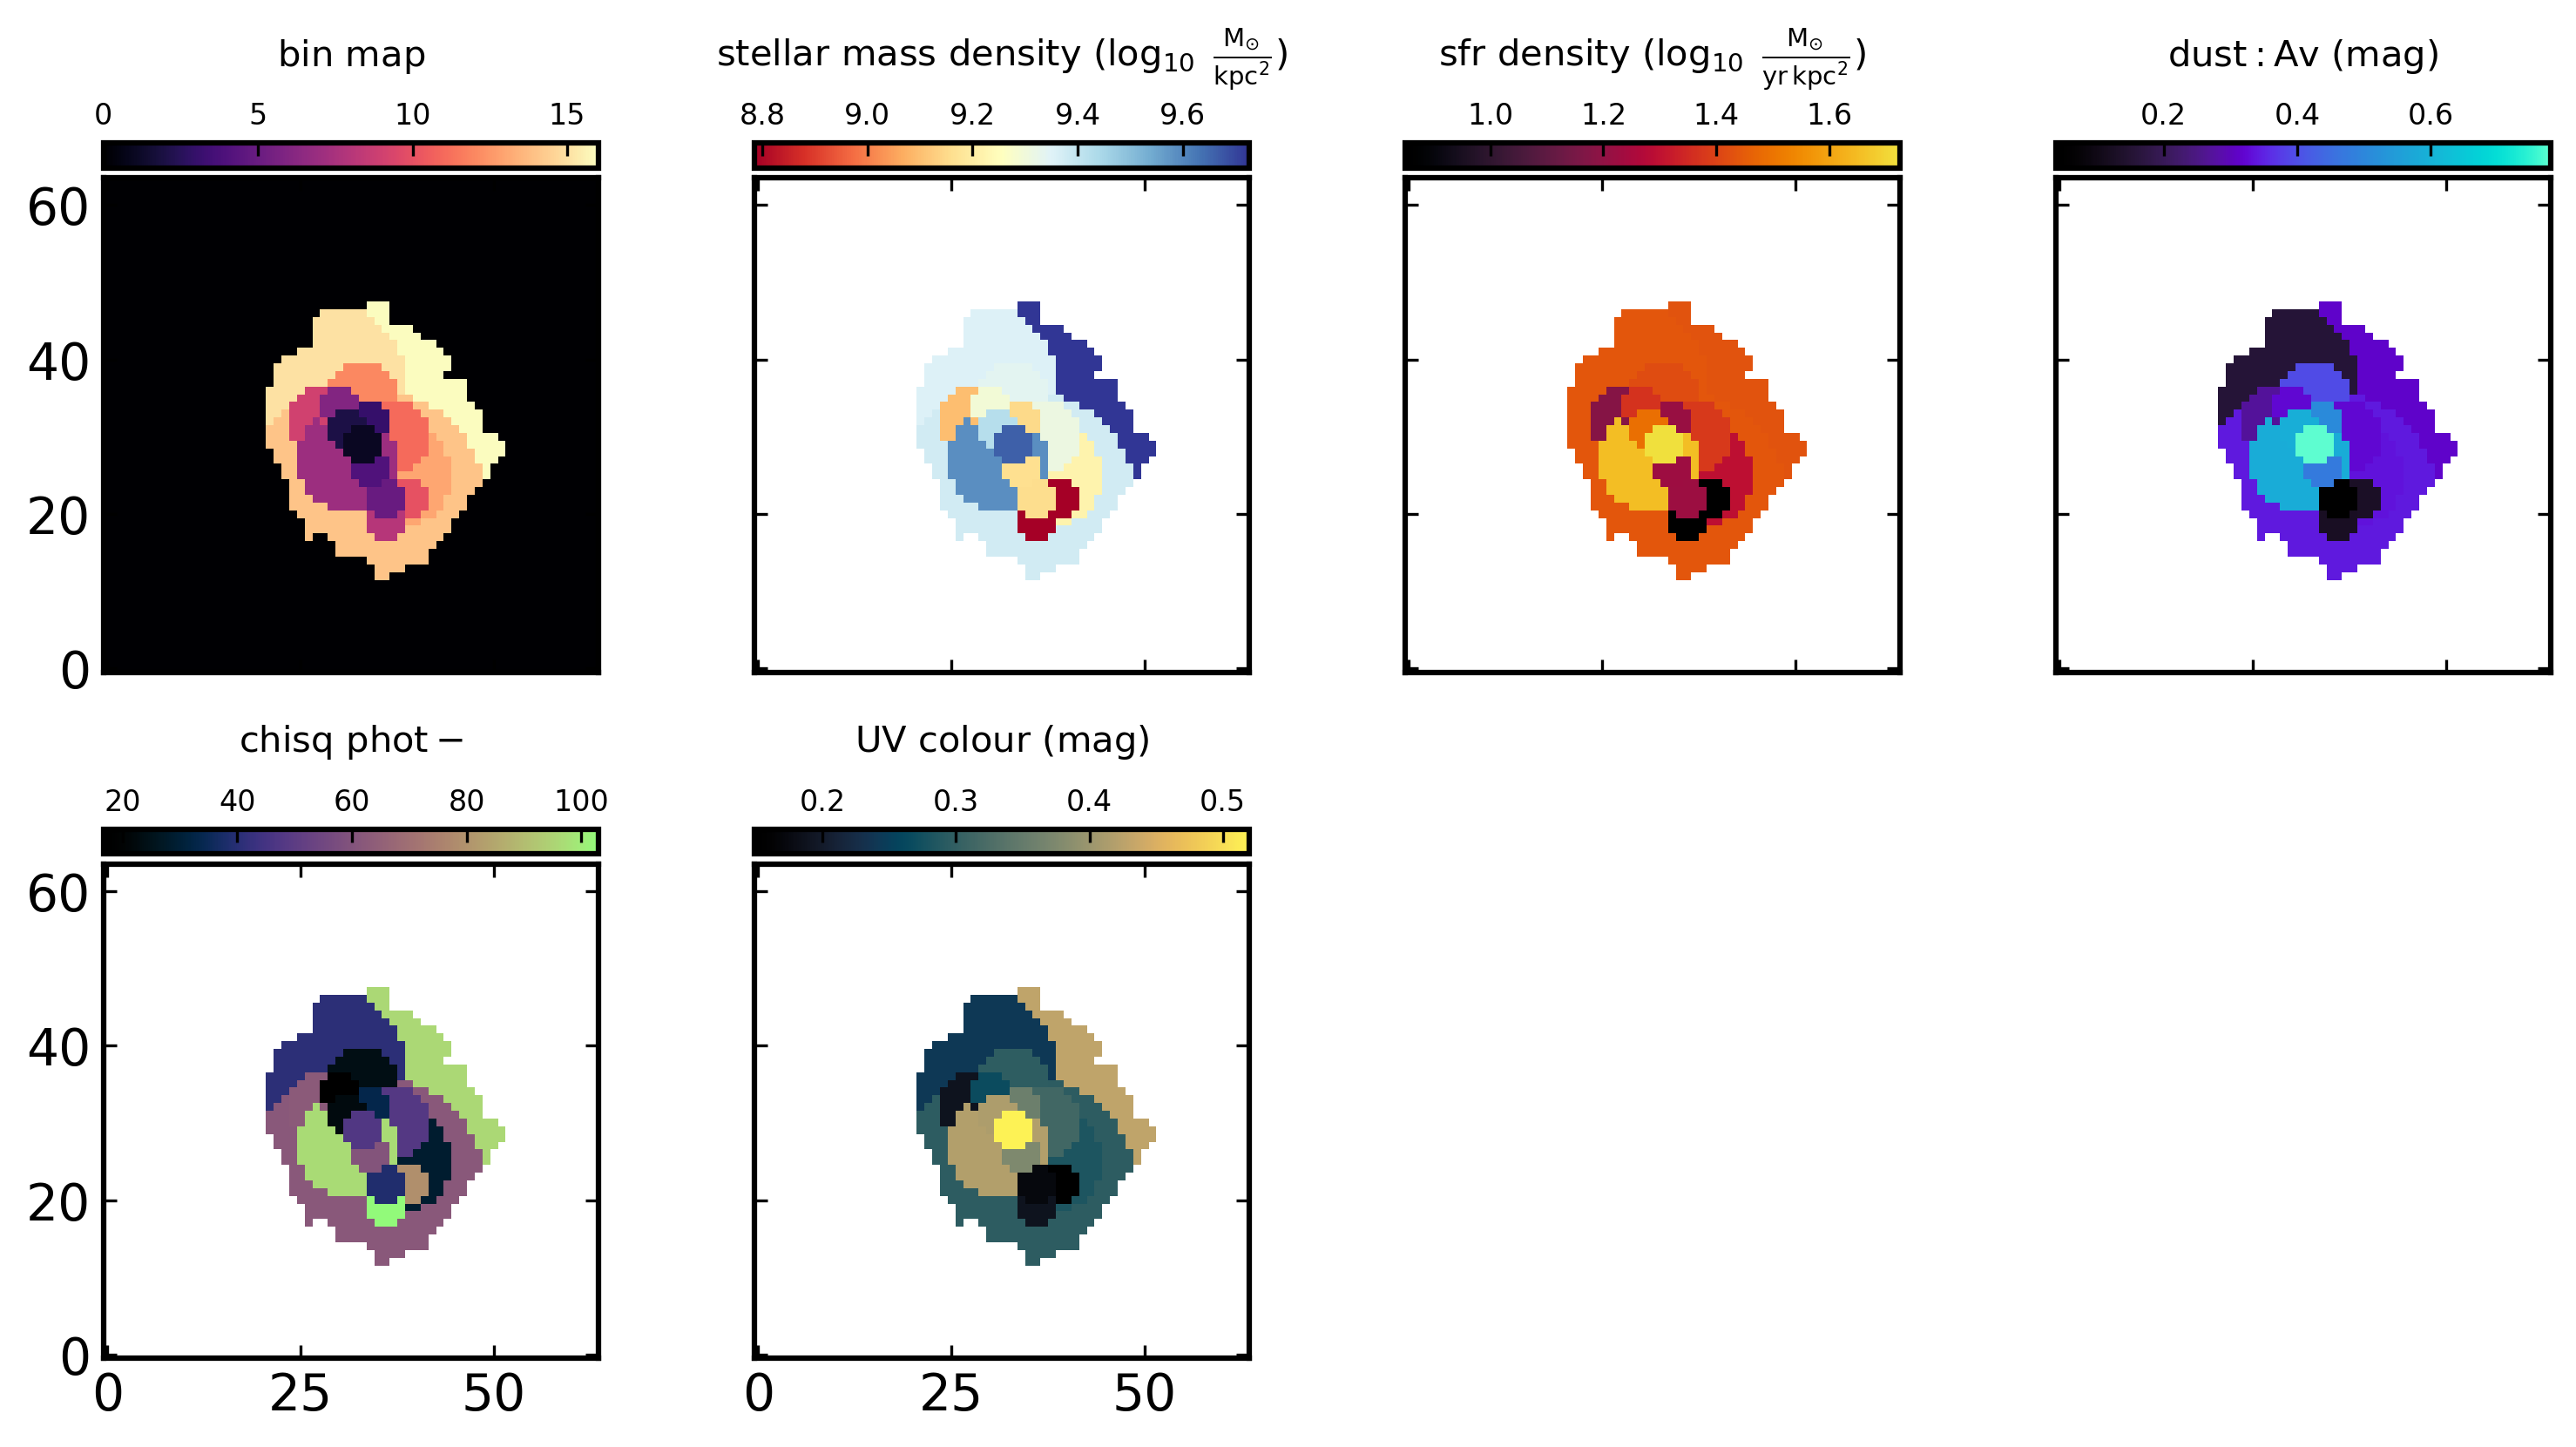

In [7]:
#%matplotlib inline
plt.rcParams['figure.dpi'] = 300
galaxy.plot_bagpipes_results('initial_test_cnst_sfh', reload_from_cat=False);



Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.
Bagpipes: PyMultiNest import failed, fitting will use the Nautilus sampler instead.
Using custom style
{'1': (0.0, 0.0, 0.0, 1.0), '2': (0.04358445, 0.02474908, 0.06061196, 1.0), '3': (0.12175321, 0.06754789, 0.1723446, 1.0), '4': (0.19870231, 0.09539359, 0.3039249, 1.0), '5': (0.27617812, 0.09911739, 0.46664673, 1.0), '6': (0.34873478, 0.05179404, 0.66949545, 1.0), '7': (0.37838226, 0.07366794, 0.86055174, 1.0), '8': (0.33042661, 0.2625048, 0.90655861, 1.0), '9': (0.26111077, 0.39483025, 0.88790274, 1.0), '10': (0.19687454, 0.49684789, 0.86482134, 1.0), '11': (0.14480878, 0.58525167, 0.8499096, 1.0), '12': (0.10312014, 0.66841567, 0.84367273, 1.0), '13': (0.05808247, 0.75091799, 0.84255664, 1.0), '14': (0.01022949, 0.83491944, 0.84076663, 1.0), '15': (0.10430211, 0.91966031, 0.83138359, 1.0), '16': (0.37176267, 0.99245625, 0.8165214, 1.0), 'TOTAL_BIN': (0.98146917, 0.56765131, 0.31114761, 1.0), 'MAG_AUTO'

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'pipes//posterior/initial_test_cnst_sfh/JOF/5371/1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

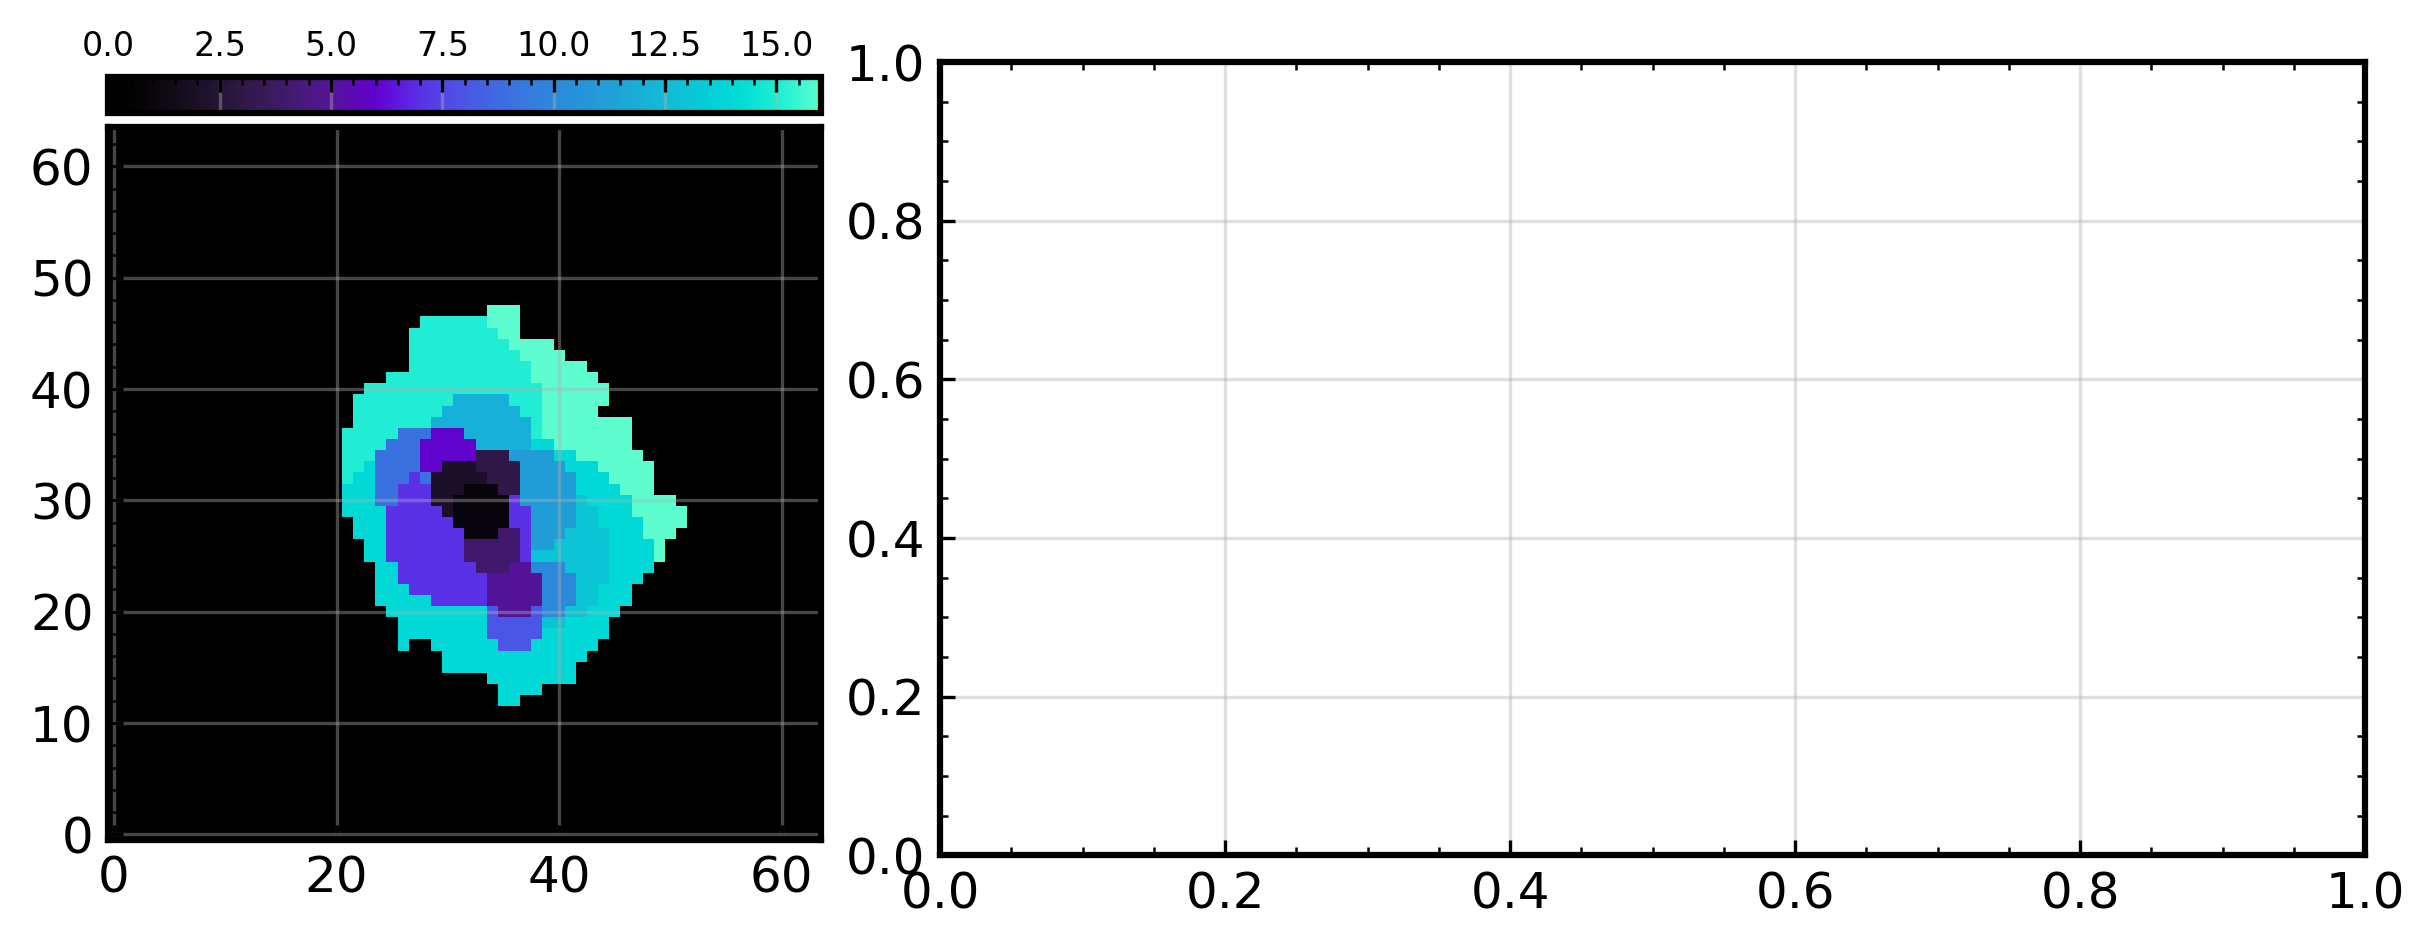

In [8]:
galaxy.plot_bagpipes_sed('initial_test_cnst_sfh')

In [3]:
galaxy.plot_bagpipes_component_comparison(run_name = 'initial_test_cnst_sfh')

Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.
Bagpipes: PyMultiNest import failed, fitting will use the Nautilus sampler instead.
Using custom style
No catalog provided. Output will be limited.
Changed directory to .
pipes//posterior/initial_test_cnst_sfh/JOF/5371/1.h5

Results loaded from pipes/posterior/plot_temp/1.h5

Fitting not performed as results have already been loaded from pipes/posterior/plot_temp/1.h5. To start over delete this file or change run.

$z:8.3^{}_{} \ \log{M_{*}}:8.0^{+0.1}_{-0.0} \ \chi^2:47.5$ (BP, constant SFH, Dust:uniform, Z: uniform)
500
No catalog provided. Output will be limited.
Changed directory to .
pipes//posterior/initial_test_cnst_sfh/JOF/5371/2.h5

Results loaded from pipes/posterior/plot_temp/2.h5

Fitting not performed as results have already been loaded from pipes/posterior/plot_temp/2.h5. To start over delete this file or change run.

$z:8.3^{}_{} \ \log{M_{*}}:7.7^{+0.1}_{-0.0} \ \chi^2:22.5$ (BP, constant S